In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
data = pd.read_csv('epa-sea-level.csv')

In [3]:
data.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
# Checking for empty data
data.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

In [6]:
data.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

In [17]:
data.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


### Scatter Plot with Regression Line 

##### About the dataset
  Year: Year of measurement (YYYY)
  CSIRO Adjusted Sea Level: Comulative changes (in inches) in sea level for the world’s oceans based on the combination of long-term tide gauge measurements and recent satellite measurements.

In [90]:
# First Regression line from 1880 - 2050
from scipy import stats
from scipy.stats import linregress
x = data['Year']
y = data['CSIRO Adjusted Sea Level']

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # Slope and intercept for the regression line 

x1 = np.array([i for i in data['Year']] + [i for i in range(2014, 2051)]) # Year 1880 - 2050
print("Average rate of rise in sea level is", round(slope,2),"inches" )

Average rate of rise in sea level is 0.06 inches


In [93]:
# Second Regression Line from year 2000 to 2014. 

yr2000 = data[data['Year'] >= 2000] # Using the data from year 2000
res = linregress(yr2000['Year'],yr2000['CSIRO Adjusted Sea Level'])  

x2 = np.array([i for i in range(2000,2051)])
print("Average rate of rise in sea level is", round(res.slope,2),"inches" )

Average rate of rise in sea level is 0.17 inches


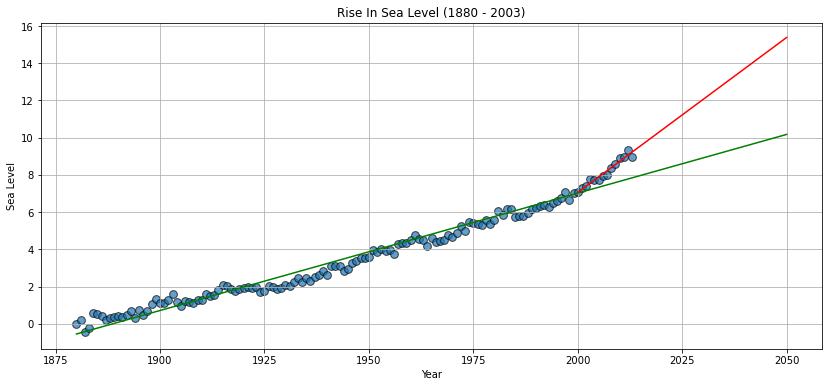

In [84]:
plt.figure(figsize=(14,6))
plt.scatter(data = data, x= 'Year', y = 'CSIRO Adjusted Sea Level', alpha=0.7, edgecolors= "k", s = 60)
plt.plot(x1, intercept + slope*x1, 'g', label='fitted line')
plt.plot(x2, res.intercept + res.slope * x2, 'r', label = "Fitted Line")
plt.title("Rise In Sea Level (1880 - 2003)")
plt.xlabel("Year")
plt.ylabel("Sea Level")
plt.grid()
plt.show()

### Observation
Above graph shows a positive correlation between absolute Sea Level and Year. Absolute Sea Level has increased at an average rate of 0.06 inches from year 1880 to 2014. The green regression line shows where we will end up in 2050 if sea level continues to rise at the current rate of 0.6.                                                                                             
On the other hand, Sea Level has increased at an alarming rate of 0.17 inches from year 2000 to 2014. At this rate, in 2050 sea level will end up somewhere around 15 inches, which is approximately 50% more than what was previously predicted. 